In [1]:
import torch
import numpy as np
import os
import glob
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/')
from cluster_g_logit_init_acceptpsi_flatlam_healthtoo import *

In [3]:



# Base directory containing all output folders
base_dir = '/Users/sarahurbut/Dropbox (Personal)/resultsg0/results/'

# List all output directories
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')))

first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/1454406906.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di

In [4]:
def load_model_essentials(base_path='/Users/sarahurbut/Dropbox (Personal)/data_for_running/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()

Loading components...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/836280224.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/var

Loaded all components successfully!


In [5]:

# Initialize list to store all phis
all_phis = []

# Load phi from each model
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract phi - might need to adjust based on how it's stored
        if 'model_state_dict' in checkpoint:
            # If phi is in state dict
            phi = checkpoint['model_state_dict']['phi']
        else:
            # If phi is stored directly
            phi = checkpoint['phi']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(phi):
            phi = phi.detach().cpu().numpy()
            
        all_phis.append(phi)
        print(f"Loaded phi from {dir_path}")
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Convert list to numpy array
all_phis = np.array(all_phis)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/1583475596.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_0_10000
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_100000_110000
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_10000_20000
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_110000_120000
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_120000_130000
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_130000_140000
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_140000_150000
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_150000_160000
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_160000_170000
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_170000_180000
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_180000_190

In [6]:
all_phis.shape
## show that for a given signature, disease, and time point, all roughtly the same


(40, 21, 348, 52)

In [7]:
first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/4181950427.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di

In [8]:
disease_names = first_model['disease_names']
disease_names = disease_names[0].tolist()

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/2992915565.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di


Disease: Colon cancer
Assigned signature (positive psi): 17


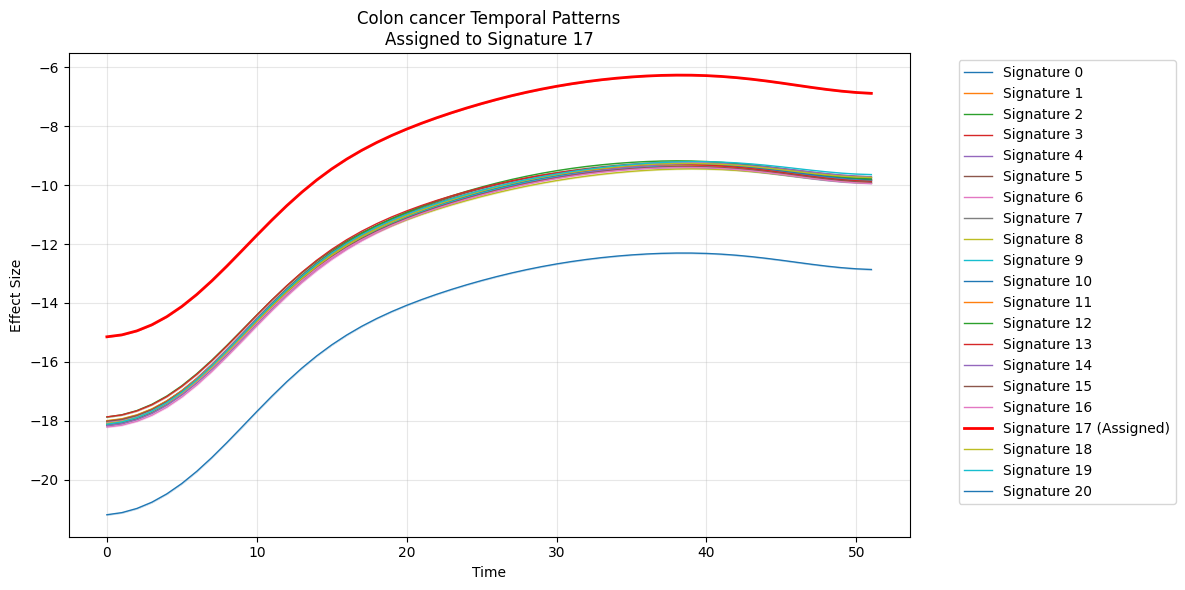


Average effect sizes across signatures:
Signature 0: -11.720 ± 0.000
Signature 1: -11.732 ± 0.000
Signature 2: -11.629 ± 0.000
Signature 3: -11.740 ± 0.000
Signature 4: -11.701 ± 0.000
Signature 5: -11.639 ± 0.000
Signature 6: -11.766 ± 0.000
Signature 7: -11.745 ± 0.000
Signature 8: -11.805 ± 0.000
Signature 9: -11.743 ± 0.000
Signature 10: -11.699 ± 0.000
Signature 11: -11.701 ± 0.000
Signature 12: -11.637 ± 0.000
Signature 13: -11.611 ± 0.000
Signature 14: -11.748 ± 0.000
Signature 15: -11.766 ± 0.000
Signature 16: -11.802 ± 0.000
Signature 17: -8.742 ± 0.000 *
Signature 18: -11.696 ± 0.000
Signature 19: -11.644 ± 0.000
Signature 20: -14.752 ± 0.000


In [9]:
import matplotlib.pyplot as plt
def verify_disease_signature_specificity(base_dir, disease_idx):
    """
    Verify that the dominant signature matches the cluster assignment for a disease
    """
    # Load first model to get psi and cluster assignments
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
    psi = first_model['model_state_dict']['psi']
    disease_names = first_model['disease_names']
    disease_names = first_model['disease_names']
    disease_names = disease_names[0].tolist()
    if torch.is_tensor(psi):
        psi = psi.detach().cpu().numpy()
    
    # Find which signature has positive psi for this disease
    assigned_signature = np.where(psi[:, disease_idx] > 0)[0]
    print(f"\nDisease: {disease_names[disease_idx]}")
    print(f"Assigned signature (positive psi): {assigned_signature[0]}")
    
    # Now load and pool phi values across all models
    output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')))
    phi_shape = first_model['model_state_dict']['phi'].shape
    pooled_phi = np.zeros((len(output_dirs), *phi_shape))
    
    for i, dir_path in enumerate(output_dirs):
        model_path = os.path.join(dir_path, 'model.pt')
        try:
            checkpoint = torch.load(model_path)
            phi = checkpoint['model_state_dict']['phi']
            if torch.is_tensor(phi):
                phi = phi.detach().cpu().numpy()
            pooled_phi[i] = phi
        except Exception as e:
            print(f"Error loading from {dir_path}: {e}")
    
    # Calculate mean phi
    mean_phi = np.mean(pooled_phi, axis=0)
    std_phi = np.std(pooled_phi, axis=0)
    
    # Plot temporal patterns with assigned signature highlighted
    plt.figure(figsize=(12, 6))
    
    for sig in range(mean_phi.shape[0]):
        mean_pattern = mean_phi[sig, disease_idx, :]
        std_pattern = std_phi[sig, disease_idx, :]
        
        # Highlight assigned signature
        if sig == assigned_signature:
            color = 'red'
            linewidth = 2
            label = f'Signature {sig} (Assigned)'
        else:
            color = f'C{sig}'
            linewidth = 1
            label = f'Signature {sig}'
        
        plt.plot(range(mean_pattern.shape[0]), mean_pattern, 
                label=label, color=color, linewidth=linewidth)
        plt.fill_between(range(mean_pattern.shape[0]), 
                        mean_pattern - std_pattern,
                        mean_pattern + std_pattern,
                        color=color, alpha=0.2)
    
    plt.title(f"{disease_names[disease_idx]} Temporal Patterns\nAssigned to Signature {assigned_signature[0]}")
    plt.xlabel('Time')
    plt.ylabel('Effect Size')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print effect sizes
    mean_effects = mean_phi[:, disease_idx, :].mean(axis=1)
    std_effects = std_phi[:, disease_idx, :].mean(axis=1)
    
    print("\nAverage effect sizes across signatures:")
    for sig in range(len(mean_effects)):
        star = " *" if sig == assigned_signature else ""
        print(f"Signature {sig}: {mean_effects[sig]:.3f} ± {std_effects[sig]:.3f}{star}")

# Usage:
#base_dir = '/Users/sarahurbut/Dropbox (Personal)/results_10k_unsharedseed/'
disease_idx = 10  # Replace with the disease index you want to check
verify_disease_signature_specificity(base_dir, disease_idx)

In [10]:
all_phis[10, :, 10,10]

array([-14.5318   , -14.647319 , -14.406505 , -14.622931 , -14.532833 ,
       -14.553898 , -14.777572 , -14.704011 , -14.619344 , -14.641654 ,
       -14.5912895, -14.574903 , -14.608093 , -14.415268 , -14.693831 ,
       -14.630655 , -14.67999  , -11.702406 , -14.632877 , -14.568008 ,
       -17.686464 ], dtype=float32)

In [11]:
first_model['clusters'][10]

np.int32(17)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/2992915565.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di


Disease: Bacterial infection NOS
Assigned signature (positive psi): 16


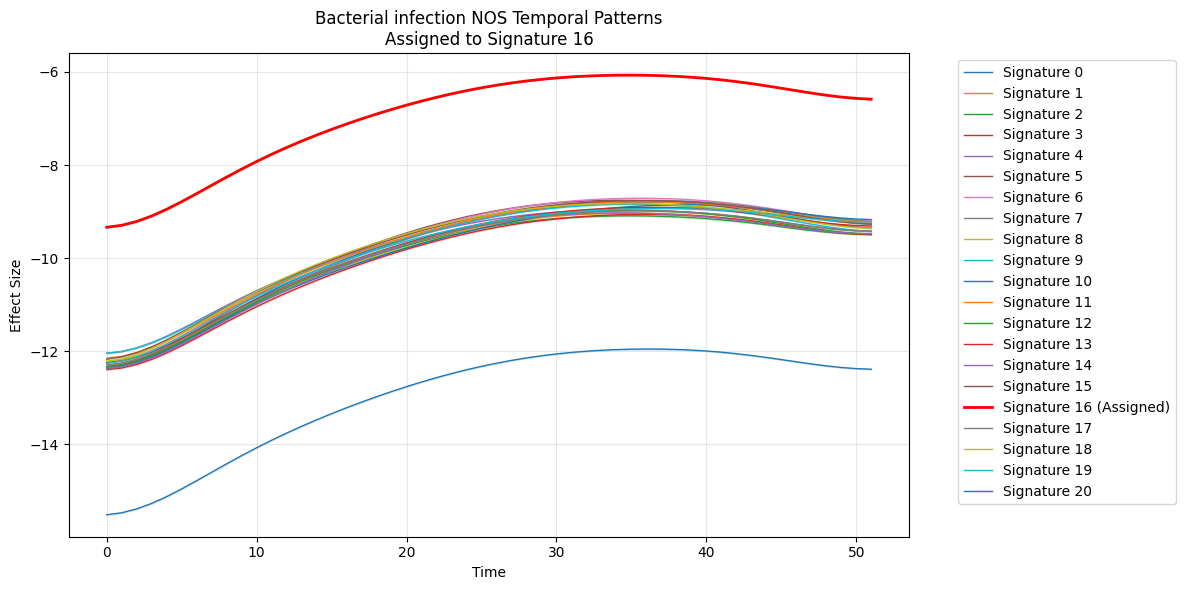


Average effect sizes across signatures:
Signature 0: -9.794 ± 0.000
Signature 1: -9.941 ± 0.000
Signature 2: -9.982 ± 0.000
Signature 3: -10.010 ± 0.000
Signature 4: -9.810 ± 0.000
Signature 5: -9.755 ± 0.000
Signature 6: -9.710 ± 0.000
Signature 7: -9.791 ± 0.000
Signature 8: -9.878 ± 0.000
Signature 9: -9.773 ± 0.000
Signature 10: -9.883 ± 0.000
Signature 11: -9.744 ± 0.000
Signature 12: -9.922 ± 0.000
Signature 13: -9.859 ± 0.000
Signature 14: -9.964 ± 0.000
Signature 15: -9.720 ± 0.000
Signature 16: -6.974 ± 0.000 *
Signature 17: -9.908 ± 0.000
Signature 18: -9.753 ± 0.000
Signature 19: -9.834 ± 0.000
Signature 20: -12.964 ± 0.000


In [12]:
verify_disease_signature_specificity(base_dir, 3)

In [13]:
import rpy2.robjects as robjects
import numpy as np

# Load the original sparse array from R
r_sparse = robjects.r.readRDS('/Users/sarahurbut/Dropbox (Personal)/withsparse/sparse_array.rds')
matrix = r_sparse[0]  # Get first timepoint

# Try to get rownames using R functions directly
try:
    # Convert to R matrix first
    robjects.r('''
        get_rownames <- function(sparse_matrix) {
            rownames(sparse_matrix)
        }
    ''')
    get_rownames = robjects.globalenv['get_rownames']
    all_patient_ids = np.array(get_rownames(matrix))
    print(f"Successfully extracted {len(all_patient_ids)} patient IDs")
except Exception as e:
    print(f"Error with R method: {e}")
    try:
        # Alternative: try getting directly from matrix slots
        all_patient_ids = np.array(matrix.slots['Dimnames'][0])
        print(f"Got IDs from slots: {len(all_patient_ids)} IDs")
    except Exception as e2:
        print(f"Error with slots method: {e2}")

# Verify we have the IDs
if 'all_patient_ids' in locals():
    print("First few IDs:", all_patient_ids[:5])
    
    def get_batch_ids(start_idx, end_idx):
        return all_patient_ids[start_idx:end_idx]

    # Example: get IDs for first batch
    batch_0_10k_ids = get_batch_ids(0, 10000)
    print(f"First batch IDs: {batch_0_10k_ids[:5]}...")
else:
    print("Failed to get patient IDs")



R[write to console]: Loading required package: Matrix



Successfully extracted 407878 patient IDs
First few IDs: ['1000015' '1000023' '1000037' '1000042' '1000059']
First batch IDs: ['1000015' '1000023' '1000037' '1000042' '1000059']...


In [14]:
print(base_dir)

/Users/sarahurbut/Dropbox (Personal)/resultsg0/results/


## Confirm that the batch ids match true IDS

In [15]:
# 1. First verify data subsetting is correct for a sample of people
batch_num = 30  # Looking at people 30000-40000
start_idx = batch_num * 10000
end_idx = (batch_num + 1) * 10000

# Load batch model
model_path = os.path.join(base_dir, f'output_{batch_num}0000_{(batch_num+1)}0000/model.pt')
batch_model = torch.load(model_path)

# Get subsets from batch model
Y_subset = batch_model['Y']
E_subset = batch_model['E']
G_subset = batch_model['G']


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/2776010181.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  batch_model = torch.load(model_path)


In [16]:

# Sample a few people to check (e.g., first 5 in batch)
sample_indices = range(5)
print("Checking disease occurrences for first 5 people in batch:")
for i in sample_indices:
    global_idx = start_idx + i
    print(f"\nPerson {global_idx}:")
    
    # Find non-zero entries in Y
    y_nonzero = np.where(Y_subset[i] != 0)
    print("\nDisease occurrences:")
    for disease_idx, time_idx in zip(y_nonzero[0], y_nonzero[1]):
        subset_val = Y_subset[i, disease_idx, time_idx]
        orig_val = Y[global_idx, disease_idx, time_idx]
        print(f"Disease {disease_idx} at time {time_idx}:")
        print(f"  Subset value: {subset_val}")
        print(f"  Original value: {orig_val}")
    
    # Similarly for E and G
    print("\nEnvironmental factors (non-zero):")
    e_nonzero = np.where(E_subset[i] != 0)
    for idx in range(len(e_nonzero[0])):
        e_subset_val = E_subset[i, e_nonzero[0][idx]]
        e_orig_val = E[global_idx, e_nonzero[0][idx]]
        print(f"E factor {e_nonzero[0][idx]}:")
        print(f"  Subset value: {e_subset_val}")
        print(f"  Original value: {e_orig_val}")
    
    print("\nGenetic factors (non-zero):")
    g_nonzero = np.where(G_subset[i] != 0)
    for idx in range(len(g_nonzero[0])):
        g_subset_val = G_subset[i, g_nonzero[0][idx]]
        g_orig_val = G[global_idx, g_nonzero[0][idx]]
        print(f"G factor {g_nonzero[0][idx]}:")
        print(f"  Subset value: {g_subset_val}")
        print(f"  Original value: {g_orig_val}")

Checking disease occurrences for first 5 people in batch:

Person 300000:

Disease occurrences:
Disease 294 at time 31:
  Subset value: 1.0
  Original value: 1.0

Environmental factors (non-zero):
E factor 0:
  Subset value: 51
  Original value: 51
E factor 1:
  Subset value: 51
  Original value: 51
E factor 2:
  Subset value: 51
  Original value: 51
E factor 3:
  Subset value: 51
  Original value: 51
E factor 4:
  Subset value: 51
  Original value: 51
E factor 5:
  Subset value: 51
  Original value: 51
E factor 6:
  Subset value: 51
  Original value: 51
E factor 7:
  Subset value: 51
  Original value: 51
E factor 8:
  Subset value: 51
  Original value: 51
E factor 9:
  Subset value: 51
  Original value: 51
E factor 10:
  Subset value: 51
  Original value: 51
E factor 11:
  Subset value: 51
  Original value: 51
E factor 12:
  Subset value: 51
  Original value: 51
E factor 13:
  Subset value: 51
  Original value: 51
E factor 14:
  Subset value: 51
  Original value: 51
E factor 15:
  Sub

In [17]:
def verify_subsetting(Y, Y_subset, start_idx=300000, n_people=5):
    print(f"Checking disease occurrences for first {n_people} people in batch:\n")
    
    for i, person in enumerate(range(start_idx, start_idx + n_people)):
        print(f"Person {person}:")
        
        # Find diseases that occurred
        diseases = np.where(Y[person].sum(axis=1) > 0)[0]
        
        if len(diseases) > 0:
            print("\nDisease occurrences:")
            for d in diseases:
                # Find when the disease occurred
                time = np.where(Y[person, d] == 1)[0][0]
                print(f"Disease {d} at time {time}:")
                print(f"  Subset value: {Y_subset[i, d, time]}")  # Use i instead of 0
                print(f"  Original value: {Y[person, d, time]}")
        else:
            print("No diseases occurred")
        print("\n")

# Test the function
verify_subsetting(Y, Y_subset)

Checking disease occurrences for first 5 people in batch:

Person 300000:

Disease occurrences:
Disease 294 at time 31:
  Subset value: 1.0
  Original value: 1.0


Person 300001:

Disease occurrences:
Disease 33 at time 32:
  Subset value: 1.0
  Original value: 1.0
Disease 60 at time 44:
  Subset value: 1.0
  Original value: 1.0
Disease 109 at time 40:
  Subset value: 1.0
  Original value: 1.0
Disease 174 at time 41:
  Subset value: 1.0
  Original value: 1.0
Disease 176 at time 41:
  Subset value: 1.0
  Original value: 1.0
Disease 183 at time 39:
  Subset value: 1.0
  Original value: 1.0
Disease 195 at time 39:
  Subset value: 1.0
  Original value: 1.0
Disease 203 at time 32:
  Subset value: 1.0
  Original value: 1.0
Disease 211 at time 42:
  Subset value: 1.0
  Original value: 1.0
Disease 263 at time 34:
  Subset value: 1.0
  Original value: 1.0
Disease 281 at time 29:
  Subset value: 1.0
  Original value: 1.0
Disease 323 at time 41:
  Subset value: 1.0
  Original value: 1.0
Disease 3

## Load and save all lambdas in batch order with IDS

In [20]:
base_dir

'/Users/sarahurbut/Dropbox (Personal)/resultsg0/results/'

In [21]:
import os
import glob
import numpy as np
import torch
import re



# List all output directories and sort them properly by their index numbers
def sort_by_index(dir_name):
    # Extract just the start number from directory name
    # e.g., from 'output_10000_20000_20241225_062028' get '10000'
    match = re.search(r'output_(\d+)_\d+', dir_name)
    if match:
        return int(match.group(1))
    return 0

# Test the sorting
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')), key=sort_by_index)

# Print first few directories to verify sorting
print("Verifying directory sorting:")
for dir_path in output_dirs[:5]:
    print(dir_path)


# Initialize the full array
all_lambdas = np.zeros((400000, 21, 52))  # [n_individuals, n_signatures, n_timepoints]

# Keep track of processed indices
processed_ranges = []

# Load and combine lambda from each model
current_idx = 0
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Extract batch range from directory name
        batch_range = re.findall(r'output_(\d+)_(\d+)', os.path.basename(dir_path))
        if batch_range:
            start_idx, end_idx = map(int, batch_range[0])
            print(f"\nProcessing batch {start_idx}-{end_idx}")
            
            # Verify this matches our current_idx
            if current_idx != start_idx:
                print(f"WARNING: Index mismatch! current_idx={current_idx}, but batch starts at {start_idx}")
        
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract lambda
        if 'model_state_dict' in checkpoint:
            lambda_values = checkpoint['model_state_dict']['lambda_']
        else:
            lambda_values = checkpoint['lambda_']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(lambda_values):
            lambda_values = lambda_values.detach().cpu().numpy()
        
        # Get batch size
        batch_size = lambda_values.shape[0]
        
        # Add to the full array
        all_lambdas[current_idx:current_idx + batch_size] = lambda_values
        
        # Store processed range
        processed_ranges.append((current_idx, current_idx + batch_size))
        
        print(f"Loaded lambda from {dir_path}")
        print(f"Batch size: {batch_size}")
        print(f"Current index range: {current_idx} to {current_idx + batch_size}")
        
        current_idx += batch_size
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Verify no gaps or overlaps in processed ranges
processed_ranges.sort()
for i in range(len(processed_ranges)-1):
    if processed_ranges[i][1] != processed_ranges[i+1][0]:
        print(f"WARNING: Gap or overlap between batches! {processed_ranges[i]} and {processed_ranges[i+1]}")

# Save the combined lambdas
np.save('all_lambdas_combined_nog.npy', all_lambdas)

# Print final verification
print("\nFinal verification:")
print("Shape of all_lambdas:", all_lambdas.shape)
print("Total individuals processed:", current_idx)
print("Processed ranges:", processed_ranges)

# Load patient IDs and verify length matches
patient_ids = np.load('/Users/sarahurbut/Dropbox (Personal)/patient_ids.npy')
# Verify dimensions
print("Total available patient IDs:", len(patient_ids))  # Should be 407,878
print("Processed lambda shape:", all_lambdas.shape)      # Should be (400000, 20, 52)

# Create mapping of processed IDs
processed_ids = patient_ids[:400000]  # Get just the first 400K IDs we processed
print("\nVerification of processed IDs:")
print("Number of processed IDs:", len(processed_ids))
print("First few IDs:", processed_ids[:5])
print("Last few IDs:", processed_ids[-5:])

# Save the processed IDs mapping
np.save('processed_patient_ids.npy', processed_ids)

# Print some stats about unprocessed patients
unprocessed_ids = patient_ids[400000:]
print("\nUnprocessed patients:")
print("Number of unprocessed IDs:", len(unprocessed_ids))
print("First few unprocessed IDs:", unprocessed_ids[:5])

Verifying directory sorting:
/Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_0_10000
/Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_10000_20000
/Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_20000_30000
/Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_30000_40000
/Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_40000_50000

Processing batch 0-10000


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/2634925235.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_0_10000
Batch size: 10000
Current index range: 0 to 10000

Processing batch 10000-20000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_10000_20000
Batch size: 10000
Current index range: 10000 to 20000

Processing batch 20000-30000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_20000_30000
Batch size: 10000
Current index range: 20000 to 30000

Processing batch 30000-40000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_30000_40000
Batch size: 10000
Current index range: 30000 to 40000

Processing batch 40000-50000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_40000_50000
Batch size: 10000
Current index range: 40000 to 50000

Processing batch 50000-60000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/resultsg0/results/output_50000_60000
Batch size: 10000
Current inde

## Convert to thetas

In [22]:
def softmax(x):
    """
    Compute softmax values for each set of scores in x.
    x shape: (n_individuals, n_signatures, n_timepoints)
    """
    # Reshape to (n_individuals * n_timepoints, n_signatures)
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])
    
    # Compute softmax
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    
    # Reshape back to original shape
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# Calculate thetas using softmax
all_thetas = softmax(all_lambdas)  # shape: (400000, 20, 52)

# Calculate AUC
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/1460757963.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T


In [23]:
theta_aucs[0,:]

array([1.3407505 , 3.97304747, 3.36393468, 7.97889547, 0.54799565,
       2.32964887, 0.43110243, 7.69065496, 4.66824734, 1.50394273,
       1.46396624, 0.40468789, 0.43940224, 1.1345235 , 1.49544603,
       0.75386882, 4.02224067, 4.23069234, 0.87469077, 2.05844892,
       0.29381251])

In [24]:
theta_aucs.shape

(400000, 21)

# confirm proper conversion 

In [25]:
def softmax_single(x):
    """
    Compute softmax for a single timepoint
    x shape: (n_signatures,)
    """
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)

def softmax_full(x):
    """
    Compute softmax for full array
    x shape: (n_individuals, n_signatures, n_timepoints)
    """
    # Reshape to (n_individuals * n_timepoints, n_signatures)
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])
    
    # Compute softmax
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    
    # Reshape back
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# Let's check a few random people at different timepoints
sample_people = [0, 100, 399999]  # First, middle, and last person
sample_timepoints = [0, 25, 51]   # First, middle, and last timepoint

print("Verifying lambda to theta conversion:")
for person in sample_people:
    print(f"\nPerson {person} (ID: {patient_ids[person]}):")
    
    for t in sample_timepoints:
        print(f"\nTimepoint {t}:")
        
        # Get lambdas for this person at this timepoint
        lambdas_t = all_lambdas[person, :, t]
        print("Lambdas:")
        for s in range(20):
            print(f"Signature {s+1}: {lambdas_t[s]:.4f}")
        
        # Calculate thetas using softmax
        thetas_t = softmax_single(lambdas_t)
        print("\nThetas (after softmax):")
        for s in range(20):
            print(f"Signature {s+1}: {thetas_t[s]:.4f}")
            
        # Verify sum to 1
        print(f"\nSum of thetas: {np.sum(thetas_t):.6f}")
        
        # Show top 3 signatures at this timepoint
        top_sigs = np.argsort(thetas_t)[-3:][::-1]
        print("\nTop 3 signatures:")
        for s in top_sigs:
            print(f"Signature {s+1}: {thetas_t[s]:.4f}")

# Calculate full theta array
all_thetas = softmax_full(all_lambdas)

# Verify shapes
print("\nArray shapes:")
print(f"Lambda array shape: {all_lambdas.shape}")
print(f"Theta array shape: {all_thetas.shape}")

Verifying lambda to theta conversion:

Person 0 (ID: 1000015):

Timepoint 0:
Lambdas:
Signature 1: -4.9536
Signature 2: -2.3421
Signature 3: -2.9936
Signature 4: -0.7949
Signature 5: -3.3153
Signature 6: -5.7438
Signature 7: -6.9983
Signature 8: -2.1821
Signature 9: -1.4754
Signature 10: -3.2451
Signature 11: -5.4856
Signature 12: -6.1435
Signature 13: -4.7051
Signature 14: -4.1161
Signature 15: -5.0441
Signature 16: -4.8574
Signature 17: -2.7223
Signature 18: -2.4835
Signature 19: -4.3950
Signature 20: -2.7003

Thetas (after softmax):
Signature 1: 0.0054
Signature 2: 0.0735
Signature 3: 0.0383
Signature 4: 0.3452
Signature 5: 0.0278
Signature 6: 0.0024
Signature 7: 0.0007
Signature 8: 0.0862
Signature 9: 0.1748
Signature 10: 0.0298
Signature 11: 0.0032
Signature 12: 0.0016
Signature 13: 0.0069
Signature 14: 0.0125
Signature 15: 0.0049
Signature 16: 0.0059
Signature 17: 0.0502
Signature 18: 0.0638
Signature 19: 0.0094
Signature 20: 0.0514

Sum of thetas: 1.000000

Top 3 signatures:
Sig

In [26]:

softmax_single(all_lambdas[0,:,0])


array([0.00539465, 0.07347074, 0.03829668, 0.34520607, 0.02776183,
       0.00244791, 0.00069816, 0.08622101, 0.17478934, 0.02978222,
       0.00316887, 0.00164126, 0.00691608, 0.01246436, 0.00492795,
       0.00593954, 0.05023206, 0.06378356, 0.0094312 , 0.05135174,
       0.00607475])

In [27]:

all_thetas[0,:,0]

array([0.00539465, 0.07347074, 0.03829668, 0.34520607, 0.02776183,
       0.00244791, 0.00069816, 0.08622101, 0.17478934, 0.02978222,
       0.00316887, 0.00164126, 0.00691608, 0.01246436, 0.00492795,
       0.00593954, 0.05023206, 0.06378356, 0.0094312 , 0.05135174,
       0.00607475])

In [28]:
person_idx = 0

# Calculate thetas for this person
thetas_person = torch.softmax(torch.tensor(all_lambdas[person_idx]), dim=0).numpy()
thetas_person[:,0]

array([0.00539465, 0.07347074, 0.03829668, 0.34520607, 0.02776183,
       0.00244791, 0.00069816, 0.08622101, 0.17478934, 0.02978222,
       0.00316887, 0.00164126, 0.00691608, 0.01246436, 0.00492795,
       0.00593954, 0.05023206, 0.06378356, 0.0094312 , 0.05135174,
       0.00607475])

In [29]:
all_lambdas[0,1,1]

np.float64(-2.343791961669922)

In [30]:
all_lambdas[20000,1,1]

np.float64(-2.3437933921813965)

# COnfirm within reason of trajectories

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/4067154478.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  signature_refs = torch.load('/Users/sarahurbu


Signature 17:
Individual AUC: 4.169
Individual Mean theta: 0.083
Reference AUC: 4.185

Signature 9:
Individual AUC: 4.634
Individual Mean theta: 0.091
Reference AUC: 4.473

Signature 4:
Individual AUC: 8.131
Individual Mean theta: 0.161
Reference AUC: 7.686


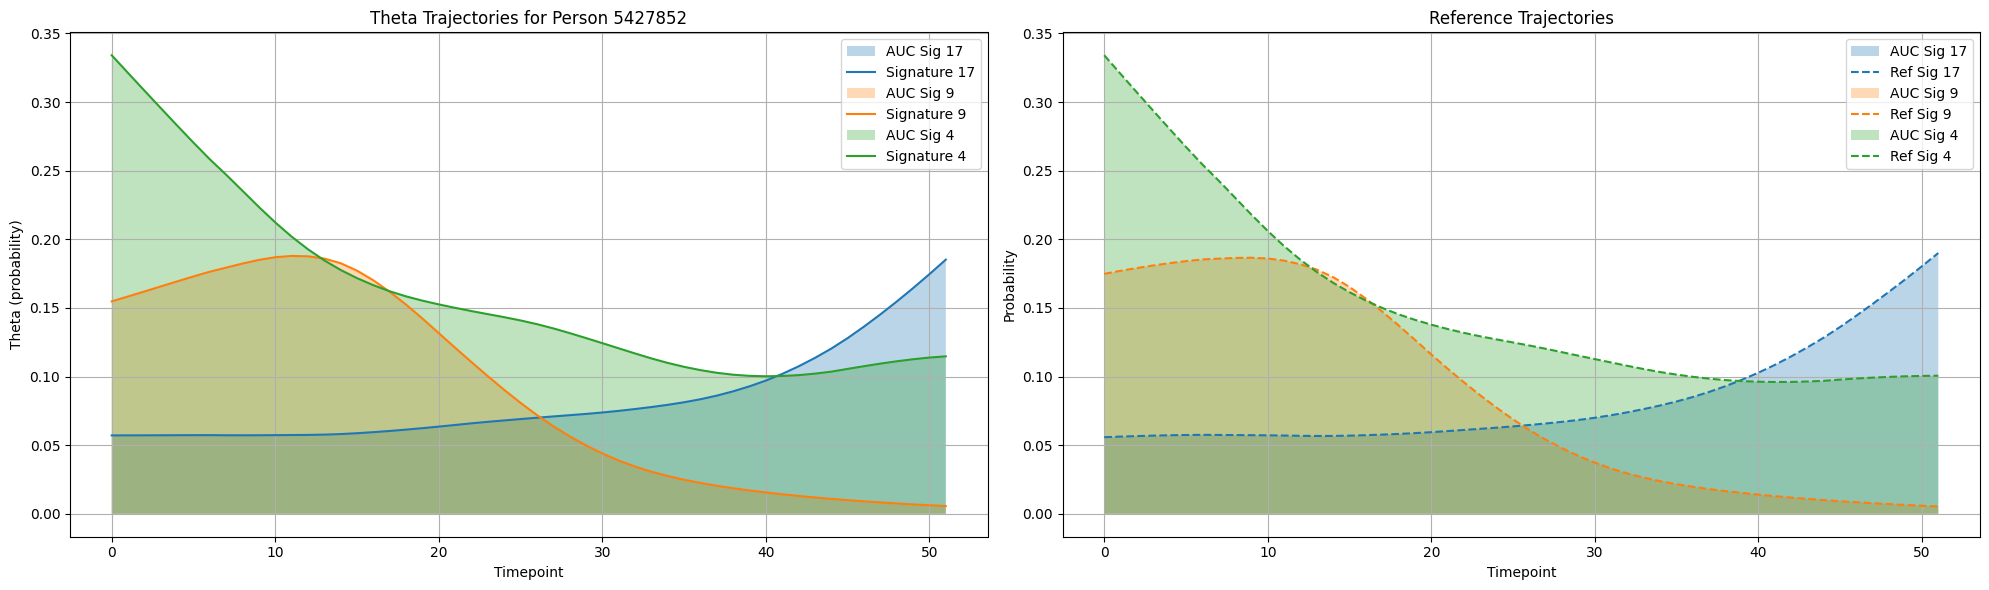

In [31]:
# Load reference trajectories
signature_refs = torch.load('/Users/sarahurbut/aladynoulli2/pyScripts/ptdir/reference_trajectories.pt')['signature_refs']
random_person = np.random.randint(0, len(all_lambdas))  # This will give a random number between 0 and the total number of people

# Take one person as an example
person_idx = random_person

# Calculate thetas for this person
thetas_person = torch.softmax(torch.tensor(all_lambdas[person_idx]), dim=0).numpy()

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
timepoints = np.arange(52)

# Plot top 3 signatures by max value
top_sigs = np.argsort(np.max(thetas_person, axis=1))[-3:]

# Plot 1: Individual's theta trajectories
for sig in top_sigs:
    ax1.fill_between(timepoints, 0, thetas_person[sig], alpha=0.3, label=f'AUC Sig {sig+1}')
    ax1.plot(timepoints, thetas_person[sig], label=f'Signature {sig+1}')
    
    # Plot 2: Reference trajectories for the same signatures
    ref_traj = torch.softmax(signature_refs, dim=0).numpy()[sig]
    ax2.fill_between(timepoints, 0, ref_traj, alpha=0.3, label=f'AUC Sig {sig+1}')
   
    ax2.plot(timepoints, ref_traj, '--', label=f'Ref Sig {sig+1}')

ax1.set_title(f'Theta Trajectories for Person {patient_ids[person_idx]}')
ax1.set_xlabel('Timepoint')
ax1.set_ylabel('Theta (probability)')
ax1.legend()
ax1.grid(True)

ax2.set_title('Reference Trajectories')
ax2.set_xlabel('Timepoint')
ax2.set_ylabel('Probability')
ax2.legend()
ax2.grid(True)

plt.tight_layout()

# Calculate and print AUCs for these signatures
for sig in top_sigs:
    auc = np.trapz(thetas_person[sig], timepoints)
    print(f"\nSignature {sig+1}:")
    print(f"Individual AUC: {auc:.3f}")
    print(f"Individual Mean theta: {np.mean(thetas_person[sig]):.3f}")
    
    ref_auc = np.trapz(torch.softmax(signature_refs, dim=0).numpy()[sig], timepoints)
    print(f"Reference AUC: {ref_auc:.3f}")

In [32]:
bpc = robjects.r.readRDS('/Users/sarahurbut/Downloads/baseline_withPCS.rds')

In [34]:
all_lambdas_load = np.load('all_lambdas_combined_nog.npy')

In [35]:
all_lambdas_load[10007,0,5]

np.float64(-4.7320356369018555)

In [36]:
all_lambdas[10007,0,5]

np.float64(-4.7320356369018555)

In [37]:

# Original method from conversion_lambdas.ipynb
def softmax_full(x):
    """Original softmax computation"""
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])  # Reshape to (N*T, K)
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# New method we were using
def torch_softmax(x):
    return torch.softmax(torch.tensor(x), dim=1)

# Compare the two methods
all_thetas = softmax_full(all_lambdas)
sample_lambda = all_lambdas[7:8]  # Keep dimensions with unsqueeze
sample_theta = torch_softmax(sample_lambda)

print("Original method (index 7, time 1):")
print(all_thetas[7, :, 1])
print("\nNew method (same slice):")
print(sample_theta[0, :, 1])

Original method (index 7, time 1):
[0.00582023 0.05874286 0.03888326 0.33767119 0.02512481 0.00379925
 0.00070479 0.09295069 0.17212434 0.03055273 0.00356557 0.00183858
 0.00743867 0.01160491 0.00571785 0.00559808 0.04125267 0.07832045
 0.01348757 0.0591523  0.00564919]

New method (same slice):
tensor([0.0058, 0.0587, 0.0389, 0.3377, 0.0251, 0.0038, 0.0007, 0.0930, 0.1721,
        0.0306, 0.0036, 0.0018, 0.0074, 0.0116, 0.0057, 0.0056, 0.0413, 0.0783,
        0.0135, 0.0592, 0.0056], dtype=torch.float64)


In [38]:
def softmax(x):
    """
    Compute softmax values for each set of scores in x.
    x shape: (n_individuals, n_signatures, n_timepoints)
    """
    # Reshape to (n_individuals * n_timepoints, n_signatures)
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])
    
    # Compute softmax
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    
    # Reshape back to original shape
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# Calculate thetas using softmax
all_thetas = softmax(all_lambdas)  # shape: (400000, 20, 52)

# Calculate AUC
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/1460757963.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T


In [39]:
K=all_lambdas.shape[1]

In [40]:
import numpy as np
import torch

# Calculate thetas for all individuals
print("Calculating thetas...")
all_thetas = torch.softmax(torch.tensor(all_lambdas), dim=1).numpy()

# Calculate AUC for each person and signature
print("Calculating AUCs...")
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(K)]).T


Calculating thetas...
Calculating AUCs...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_79026/3378791062.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(K)]).T


In [41]:
# 1. Verify thetas sum to 1 at given timepoints
sample_people = [0, 100, 399999]  # First, middle, and last person
sample_timepoints = [0, 25, 51]   # First, middle, and last timepoint

print("Verifying theta sums and softmax calculations:")
for person in sample_people:
    print(f"\nPerson {person}:")
    
    for t in sample_timepoints:
        # Check sum to 1
        theta_sum = np.sum(all_thetas[person, :, t])
        print(f"\nTimepoint {t}:")
        print(f"Sum of thetas: {theta_sum:.6f}")
        
        # Compare with direct softmax calculation
        direct_softmax = torch.softmax(torch.tensor(all_lambdas[person, :, t]), dim=0).numpy()
        match = np.allclose(all_thetas[person, :, t], direct_softmax)
        print(f"Matches direct softmax calculation: {match}")
        
        if not match:
            print("Max difference:", np.max(np.abs(all_thetas[person, :, t] - direct_softmax)))

Verifying theta sums and softmax calculations:

Person 0:

Timepoint 0:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 25:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 51:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Person 100:

Timepoint 0:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 25:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 51:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Person 399999:

Timepoint 0:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 25:
Sum of thetas: 1.000000
Matches direct softmax calculation: True

Timepoint 51:
Sum of thetas: 1.000000
Matches direct softmax calculation: True


In [42]:
Y.shape

torch.Size([407878, 348, 52])

In [43]:

# Create REGENIE phenotype file
# Print dimensions to verify
print(f"Number of patient IDs: {len(patient_ids)}")  # Should be 407878
print(f"Number of theta AUCs: {len(theta_aucs)}")    # Should match patient_ids
# Create mapping of processed IDs
processed_ids = patient_ids[:400000]  # Get just the first 400K IDs we processed

# Create REGENIE phenotype file with correct number of individuals
# Create REGENIE phenotype file
output_file = 'signature_auc_phenotypes_zerog.txt'
with open(output_file, 'w') as f:
    # Write header
    header = ['FID', 'IID'] + [f'SIG{i}_AUC' for i in range(K)]
    f.write('\t'.join(header) + '\n')
    
    # Write data only for the first 400K individuals
    for i in range(len(processed_ids)):
        fid = processed_ids[i]
        iid = processed_ids[i]
        aucs = theta_aucs[i]
        
        line = [str(fid), str(iid)] + [f"{x:.6f}" for x in aucs]
        f.write('\t'.join(line) + '\n')

# Print verification
print("\nVerification:")
print(f"Number of processed IDs: {len(processed_ids)}")
print(f"First few IDs: {processed_ids[:5]}")
print(f"Last few IDs: {processed_ids[-5:]}")

Number of patient IDs: 407878
Number of theta AUCs: 400000

Verification:
Number of processed IDs: 400000
First few IDs: ['1000015' '1000023' '1000037' '1000042' '1000059']
Last few IDs: ['5929605' '5929616' '5929627' '5929638' '5929643']


In [44]:
theta_aucs[0,:]

array([1.3407505 , 3.97304747, 3.36393468, 7.97889547, 0.54799565,
       2.32964887, 0.43110243, 7.69065496, 4.66824734, 1.50394273,
       1.46396624, 0.40468789, 0.43940224, 1.1345235 , 1.49544603,
       0.75386882, 4.02224067, 4.23069234, 0.87469077, 2.05844892,
       0.29381251])

In [ ]:
print(f"Number of patient IDs: {len(patient_ids)}")
print(f"Number of theta AUCs: {len(theta_aucs)}")

In [ ]:
theta_aucs[398000,]

In [ ]:
processed_ids[0]

In [ ]:
import matplotlib.pyplot as plt

# Take one person as an example
person_idx = 0

# Calculate thetas for this person
thetas_person = torch.softmax(torch.tensor(all_lambdas[person_idx]), dim=0).numpy()

# Plot trajectories for a few signatures
plt.figure(figsize=(12, 6))
timepoints = np.arange(52)

# Plot top 3 signatures by max value
top_sigs = np.argsort(np.mean(thetas_person, axis=1))[-3:]

for sig in top_sigs:
    plt.fill_between(timepoints, 0, thetas_person[sig], alpha=0.3, label=f'AUC Sig {sig}')
    plt.plot(timepoints, thetas_person[sig], label=f'Signature {sig+1}')

plt.title(f'Theta Trajectories for Person {patient_ids[person_idx]}')
plt.xlabel('Timepoint')
plt.ylabel('Theta (probability)')
plt.legend()
plt.grid(True)

# Calculate and print AUCs for these signatures
for sig in top_sigs:
    auc = np.trapz(thetas_person[sig], timepoints)
    print(f"\nSignature {sig} AUC: {auc:.3f}")
    print(f"Mean theta: {np.mean(thetas_person[sig]):.3f}")

In [ ]:
len(patient_ids)

In [ ]:
patient_ids[0:5]

In [60]:
import pandas as pd
# Convert R dataframe to pandas
bpc_pd = pd.DataFrame({
    'identifier': robjects.r.rownames(bpc),
    'sex': np.array(bpc.rx2('f.31.0.0')),
    'birth_year': np.array(bpc.rx2('f.34.0.0')),
    'enrollment': np.array(bpc.rx2('f.53.0.0'))
})

# Add PCs
for i in range(1, 41):  # assuming 40 PCs
    col_name = f'f.22009.0.{i}'
    if col_name in bpc.names:
        bpc_pd[f'PC{i}'] = np.array(bpc.rx2(col_name))


In [61]:
import pandas as pd

In [ ]:
# Check format of patient_ids
print("Patient IDs format:")
print("First 5 patient_ids:", patient_ids[:5])
print("Type of first ID:", type(patient_ids[0]))

# Check format of BPC IDs
print("\nBPC IDs format:")
print("First 5 BPC IDs:", bpc_pd['identifier'].head().values)
print("Type of first BPC ID:", type(bpc_pd['identifier'].iloc[0]))

# Let's look at the full BPC data structure
print("\nBPC DataFrame head:")
print(bpc_pd.head())

# Check if there are any formatting differences
print("\nSample ID comparisons:")
print("Patient ID example:", patient_ids[0])
print("BPC ID example:", bpc_pd['identifier'].iloc[0])
print("Patient ID length:", len(str(patient_ids[0])))
print("BPC ID length:", len(str(bpc_pd['identifier'].iloc[0])))

# Try printing the R object structure
print("\nR object structure:")
print(robjects.r.str(bpc))

In [ ]:
# 1. First, ensure IDs are in the same format
def standardize_ids(ids):
    return set(str(int(float(id))) for id in ids if not pd.isna(id))

# 2. Load and process BPC data
bpc_pd = pd.DataFrame({
    'identifier': np.array(bpc.rx2('identifier')).astype(int),  # Convert to integer
    'sex': np.array(bpc.rx2('f.31.0.0')),
    'birth_year': np.array(bpc.rx2('f.34.0.0')),
    'enrollment': np.array(bpc.rx2('f.53.0.0'))
})

# Add PCs
for i in range(1, 41):
    col_name = f'f.22009.0.{i}'
    if col_name in bpc.names:
        bpc_pd[f'PC{i}'] = np.array(bpc.rx2(col_name))

# 3. Convert IDs to standardized format
bpc_ids = standardize_ids(bpc_pd['identifier'])
patient_ids_set = standardize_ids(patient_ids)

# 4. Check overlap
print("\nAfter standardization:")
print("Number of patient IDs:", len(patient_ids_set))
print("Number of BPC IDs:", len(bpc_ids))
print("Number of overlapping IDs:", len(patient_ids_set.intersection(bpc_ids)))

# 5. Debug sample IDs
print("\nSample patient IDs:", list(sorted(list(patient_ids_set)))[:5])
print("Sample BPC IDs:", list(sorted(list(bpc_ids)))[:5])

# 6. Check ID ranges
print("\nID ranges:")
print("Patient IDs range:", min(patient_ids_set), "to", max(patient_ids_set))
print("BPC IDs range:", min(bpc_ids), "to", max(bpc_ids))

In [ ]:
# Create matched BPC dataframe with only our patients and their covariates
matched_bpc = pd.DataFrame({
    'identifier': np.array(bpc.rx2('identifier')).astype(float).astype(int).astype(str),
    'sex': np.array(bpc.rx2('f.31.0.0')),
    'birth_year': np.array(bpc.rx2('f.34.0.0')),
    'enrollment': np.array(bpc.rx2('f.53.0.0'))
})

# Add just 20 PCs
for i in range(1, 21):  # Changed from 41 to 21 to get PCs 1-20
    col_name = f'f.22009.0.{i}'
    matched_bpc[f'PC{i}'] = np.array(bpc.rx2(col_name))

# Convert patient_ids and sort
patient_ids = [str(int(float(id))) for id in patient_ids]
matched_bpc = matched_bpc[matched_bpc['identifier'].isin(patient_ids)].copy()
id_to_position = {id: i for i, id in enumerate(patient_ids)}
matched_bpc['sort_idx'] = matched_bpc['identifier'].map(id_to_position)
matched_bpc = matched_bpc.sort_values('sort_idx').drop('sort_idx', axis=1)

# Verify
print("Verification:")
print(f"Number of rows in matched data: {len(matched_bpc)}")
print(f"Number of columns: {len(matched_bpc.columns)}")  # Should be 24 (identifier + sex + birth_year + enrollment + 20 PCs)
print("\nColumns:", matched_bpc.columns.tolist())

In [ ]:
# 1. Save main phenotype/covariate file
# Reorder columns to have identifier first, then covariates
cols_order = ['identifier', 'sex', 'birth_year', 'enrollment'] + [f'PC{i}' for i in range(1,21)]
matched_bpc = matched_bpc[cols_order]
print("\nFirst few lines of covariate file:")
print(matched_bpc.head().to_string())

In [ ]:
import pandas as pd 
matched_bpc = pd.read_csv('ukbb_covariates_400k.txt', sep=' ')
# Calculate regular AUCs for all signatures (including health signature)
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(21)]).T


In [ ]:

# Print dimensions for debugging
print("Dimensions check:")
print(f"matched_bpc shape: {matched_bpc.shape}")
print(f"theta_aucs shape: {theta_aucs.shape}")
print(f"patient_ids length: {len(patient_ids)}")

# Create the AUC file with correct IDs, making sure indices align
output_file = 'signature_auc_phenotypes_not_normalized.txt'
with open(output_file, 'w') as f:
    # Write header
    header = ['FID', 'IID'] + [f'SIG{i+1}_AUC' for i in range(21)]
    f.write('\t'.join(header) + '\n')
    
    # Make sure we only iterate over the length we have
    n_samples = min(len(matched_bpc), len(theta_aucs))
    
    # Write data for each person
    for i in range(n_samples):
        fid = matched_bpc.iloc[i]['identifier']
        iid = matched_bpc.iloc[i]['identifier']
        aucs = theta_aucs[i]
        
        line = [str(fid), str(iid)] + [f"{x:.6f}" for x in aucs]
        f.write('\t'.join(line) + '\n')

# Print first few rows of each for verification
print("\nFirst few matched_bpc IDs:")
print(matched_bpc['identifier'].head())
print("\nFirst few patient_ids:")
print(patient_ids[:5])

In [ ]:
len(ages)

In [ ]:
# Create figure
plt.figure(figsize=(15, 8))

# Example data for one signature
example_person = 1
example_sig = 3
age = ages[example_person]
timepoints = min(52, age - 29 - 1)

# Plot trajectory
plt.subplot(1, 2, 1)
plt.fill_between(range(52), 0, all_thetas[example_person, example_sig, :], alpha=0.3)
plt.plot(range(52), all_thetas[example_person, example_sig, :], 'b-', label='Full trajectory')
plt.axvline(x=timepoints, color='r', linestyle='--', label=f'Age cutoff ({age} years)')
plt.title(f'Full Trajectory AUC\nTotal = {theta_aucs[example_person, example_sig]:.3f}')
plt.xlabel('Timepoint (Age 30-81)')
plt.ylabel('Signature Intensity')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot normalized version with observed period highlighted
plt.subplot(1, 2, 2)
plt.fill_between(range(timepoints), 0, all_thetas[example_person, example_sig, :timepoints], 
                 alpha=0.5, color='blue', label='Observed period')
plt.fill_between(range(timepoints, 52), 0, all_thetas[example_person, example_sig, timepoints:], 
                 alpha=0.1, color='gray', label='Unobserved period')
plt.plot(range(52), all_thetas[example_person, example_sig, :], 'b-')
plt.axvline(x=timepoints, color='r', linestyle='--', label=f'Age cutoff ({age} years)')
plt.axhline(y=normalized_aucs[example_person, example_sig], color='g', linestyle='--', 
           label=f'Normalized value\n(Observed AUC/{timepoints} = {normalized_aucs[example_person, example_sig]:.3f})')
plt.title(f'Normalized AUC (Observed Period Only)\nAverage = {normalized_aucs[example_person, example_sig]:.3f}')
plt.xlabel('Timepoint (Age 30-81)')
plt.ylabel('Signature Intensity')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle(f'AUC Normalization Example\nPatient {matched_bpc.iloc[example_person]["identifier"]} (Age {age})', 
            y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
def calculate_age_normalized_aucs(all_thetas, matched_bpc):
    # Get dimensions
    N = all_thetas.shape[0]  # number of individuals
    K = all_thetas.shape[1]  # number of states/signatures
    
    # Initialize theta_aucs first - full AUC for all timepoints
    theta_aucs = np.zeros((N, K))
    for i in range(N):
        for s in range(K):
            theta_aucs[i, s] = np.trapz(all_thetas[i, s, :], np.arange(52))
    
    # Calculate age at end of follow-up (2023)
    END_YEAR = 2023
    matched_bpc['age'] = END_YEAR - matched_bpc['birth_year']
    
    # Initialize normalized AUCs array
    normalized_aucs = np.zeros_like(theta_aucs)
    
    # Process each person
    for i in range(len(theta_aucs)):
        age = matched_bpc.iloc[i]['age']
        
        # Convert age to timepoint index (age - 29) - 1
        timepoints_to_use = min(52, max(0, age - 29 - 1))
        
        # Calculate AUC up to age-appropriate timepoint for each signature
        for s in range(K):
            if timepoints_to_use > 0:
                normalized_aucs[i, s] = np.trapz(all_thetas[i, s, :timepoints_to_use], 
                                               np.arange(timepoints_to_use)) / timepoints_to_use
    
    # Print some verification stats
    print("\nAUC Statistics:")
    print(f"Original AUCs mean: {np.mean(theta_aucs):.4f}")
    print(f"Normalized AUCs mean: {np.mean(normalized_aucs):.4f}")
    print(f"\nAge range: {np.min(matched_bpc['age'])} to {np.max(matched_bpc['age'])}")
    
    return normalized_aucs, theta_aucs, matched_bpc['age'].values

# Usage:
normalized_aucs, full_aucs, ages = calculate_age_normalized_aucs(all_thetas, matched_bpc)

# Additional verification
print("\nShape of arrays:")
print(f"Normalized AUCs: {normalized_aucs.shape}")
print(f"Full AUCs: {full_aucs.shape}")

# Compare distributions
print("\nDistribution comparison:")
print("Full AUCs percentiles:", np.percentile(full_aucs, [0, 25, 50, 75, 100]))
print("Normalized AUCs percentiles:", np.percentile(normalized_aucs, [0, 25, 50, 75, 100]))

In [ ]:
normalized_aucs.shape

In [ ]:
def verify_aucs(all_thetas, theta_aucs, normalized_aucs, matched_bpc, sample_indices=[0, 100, 1000]):
    """
    Verify AUC calculations for sample patients
    """
    print("\nVerifying AUC calculations for sample patients:")
    
    for idx in sample_indices:
        print(f"\nPatient {idx} (ID: {matched_bpc.iloc[idx]['identifier']}):")
        print(f"Age: {2023 - matched_bpc.iloc[idx]['birth_year']}")
        age = 2023 - matched_bpc.iloc[idx]['birth_year']
        timepoints_to_use = min(52, max(0, age - 29 - 1))
        
        # Pick a few signatures to check
        for sig in [0, 5, 10]:
            print(f"\nSignature {sig}:")
            
            # Manual calculation of regular AUC
            manual_auc = np.trapz(all_thetas[idx, sig, :], np.arange(52))
            stored_auc = theta_aucs[idx, sig]
            
            # Manual calculation of normalized AUC
            if timepoints_to_use > 0:
                manual_norm_auc = np.trapz(all_thetas[idx, sig, :timepoints_to_use], 
                                         np.arange(timepoints_to_use)) / timepoints_to_use
            else:
                manual_norm_auc = 0
            stored_norm_auc = normalized_aucs[idx, sig]
            
            print("Regular AUC:")
            print(f"Manual calculation: {manual_auc:.6f}")
            print(f"Stored value: {stored_auc:.6f}")
            print(f"Difference: {abs(manual_auc - stored_auc):.6f}")
            
            print("\nNormalized AUC:")
            print(f"Manual calculation: {manual_norm_auc:.6f}")
            print(f"Stored value: {stored_norm_auc:.6f}")
            print(f"Difference: {abs(manual_norm_auc - stored_norm_auc):.6f}")
            
            # Print first few theta values for this signature
            print(f"\nFirst few theta values for signature {sig}:")
            print(all_thetas[idx, sig, :5])
            
            if timepoints_to_use < 52:
                print(f"\nUsing {timepoints_to_use} timepoints for normalization")
                print(f"Theta values up to age-appropriate timepoint:")
                print(all_thetas[idx, sig, :timepoints_to_use])

# Run verification
verify_aucs(all_thetas, theta_aucs, normalized_aucs, matched_bpc)

In [ ]:
# Save results with age information
output_file = 'age_normalized_signature_auc_phenotypes.txt'
with open(output_file, 'w') as f:
    # Write header with age and timepoints used
    header = ['FID', 'IID', 'age', 'timepoints_used'] + [f'SIG{i+1}_AUC_NORM' for i in range(20)]
    f.write('\t'.join(header) + '\n')
    
    for i in range(len(normalized_aucs)):
        fid = matched_bpc.iloc[i]['identifier']
        iid = matched_bpc.iloc[i]['identifier']
        age = ages[i]
        timepoints = age - 29 - 1  # Convert to 0-based index
        aucs = normalized_aucs[i]
        
        line = [str(fid), str(iid), f"{age:.0f}", f"{timepoints}"] + [f"{x:.6f}" for x in aucs]
        f.write('\t'.join(line) + '\n')

# Save numpy array version too

np.save('signature_aucs_normalized.npy', normalized_aucs)

print("Files created:")
print("1. age_normalized_signature_auc_phenotypes.txt - Tab-delimited file with IDs and metadata")
print("2. signature_aucs_raw.npy - Raw AUCs")
print("3. signature_aucs_normalized.npy - Age-normalized AUCs")

# Print some verification stats
print("\nVerification stats:")
print(f"Number of individuals: {len(normalized_aucs)}")
print("\nSummary of normalized AUCs:")
for sig in range(20):
    print(f"\nSignature {sig+1}:")
    print(f"Mean: {np.mean(normalized_aucs[:, sig]):.4f}")
    print(f"Std: {np.std(normalized_aucs[:, sig]):.4f}")

In [ ]:
K=all_lambdas.shape[1]
K

In [ ]:
def calculate_theta_aucs(all_thetas):
    """
    Calculate regular AUCs for thetas across all timepoints
    
    Parameters:
    all_thetas: array of shape (N, K, T) with theta values
    
    Returns:
    theta_aucs: array of shape (N, K) with AUC values
    """
    N = all_thetas.shape[0]  # number of individuals
    K = all_thetas.shape[1]  # number of states/signatures
    
    # Initialize theta_aucs
    theta_aucs = np.zeros((N, K))
    
    # Calculate AUC for each person and signature
    for i in range(N):
        for s in range(K):
            theta_aucs[i, s] = np.trapz(all_thetas[i, s, :], np.arange(52))
    
    # Print verification stats
    print("\nRegular Theta AUCs Statistics:")
    print(f"Shape: {theta_aucs.shape}")
    print(f"Mean AUC: {np.mean(theta_aucs):.4f}")
    print(f"Range: [{np.min(theta_aucs):.4f}, {np.max(theta_aucs):.4f}]")
    print("\nMean AUC by signature:")
    for s in range(K):
        print(f"Signature {s}: {np.mean(theta_aucs[:, s]):.4f}")
    
    return theta_aucs

def calculate_age_normalized_aucs(all_thetas, matched_bpc, theta_aucs):
    """
    Calculate age-normalized AUCs using pre-computed theta_aucs
    """
    # Calculate age at end of follow-up (2023)
    END_YEAR = 2023
    matched_bpc['age'] = END_YEAR - matched_bpc['birth_year']
    
    # Initialize normalized AUCs array
    normalized_aucs = np.zeros_like(theta_aucs)
    
    # Process each person
    for i in range(len(theta_aucs)):
        age = matched_bpc.iloc[i]['age']
        timepoints_to_use = min(52, max(0, age - 29 - 1))
        
        # Calculate normalized AUC for each signature
        for s in range(K):
            if timepoints_to_use > 0:
                normalized_aucs[i, s] = np.trapz(all_thetas[i, s, :timepoints_to_use], 
                                               np.arange(timepoints_to_use)) / timepoints_to_use
    
    return normalized_aucs, matched_bpc['age'].values

# Usage:
# First calculate regular AUCs
theta_aucs = calculate_theta_aucs(all_thetas)

# Then calculate age-normalized version
normalized_aucs, ages = calculate_age_normalized_aucs(all_thetas, matched_bpc, theta_aucs)

# Compare the two
print("\nComparison of regular vs normalized AUCs:")
print(f"Regular AUCs mean: {np.mean(theta_aucs):.4f}")
print(f"Normalized AUCs mean: {np.mean(normalized_aucs):.4f}")

In [ ]:
# Save results with age information
output_file = 'age_normalized_signature_auc_phenotypes.txt'
with open(output_file, 'w') as f:
    # Write header with age and timepoints used
    header = ['FID', 'IID', 'age', 'timepoints_used'] + [f'SIG{i+1}_AUC_NORM' for i in range(K)]
    f.write('\t'.join(header) + '\n')
    
    for i in range(len(normalized_aucs)):
        fid = matched_bpc.iloc[i]['identifier']
        iid = matched_bpc.iloc[i]['identifier']
        age = ages[i]
        timepoints = age - 29 - 1  # Convert to 0-based index
        aucs = normalized_aucs[i]
        
        line = [str(fid), str(iid), f"{age:.0f}", f"{timepoints}"] + [f"{x:.6f}" for x in aucs]
        f.write('\t'.join(line) + '\n')

# Save numpy array version too

np.save('signature_aucs_normalized.npy', normalized_aucs)

print("Files created:")
print("1. age_normalized_signature_auc_phenotypes.txt - Tab-delimited file with IDs and metadata")
print("2. signature_aucs_raw.npy - Raw AUCs")
print("3. signature_aucs_normalized.npy - Age-normalized AUCs")

# Print some verification stats
print("\nVerification stats:")
print(f"Number of individuals: {len(normalized_aucs)}")
print("\nSummary of normalized AUCs:")
for sig in range(K):
    print(f"\nSignature {sig+1}:")
    print(f"Mean: {np.mean(normalized_aucs[:, sig]):.4f}")
    print(f"Std: {np.std(normalized_aucs[:, sig]):.4f}")

In [ ]:
# Check the saved files
print("Checking normalized AUC file:")
!head -n 5 age_normalized_signature_auc_phenotypes.txt

# Load specific lines to verify against our calculations
import pandas as pd

# Read the saved files
norm_aucs = pd.read_csv('age_normalized_signature_auc_phenotypes.txt', sep='\t')

# Check specific patients we just verified
for idx in [0, 100, 1000]:
    print(f"\nVerifying patient at index {idx} (ID: {matched_bpc.iloc[idx]['identifier']}):")
    
    # Get values from our saved file
    file_row = norm_aucs[norm_aucs['IID'] == str(matched_bpc.iloc[idx]['identifier'])]
    
    if not file_row.empty:
        print(f"From file:")
        print(f"Age: {file_row['age'].values[0]}")
        print(f"Signature 5 normalized AUC: {file_row['SIG6_AUC_NORM'].values[0]:.6f}")  # Note: SIG6 for signature 5 (0-based vs 1-based)
        print(f"Signature 10 normalized AUC: {file_row['SIG11_AUC_NORM'].values[0]:.6f}")
        
        print("\nFrom our calculations:")
        print(f"Signature 5 normalized AUC: {normalized_aucs[idx, 5]:.6f}")
        print(f"Signature 10 normalized AUC: {normalized_aucs[idx, 10]:.6f}")

In [ ]:
# Check the saved files
print("Checking normalized AUC file:")
!head -n 5 age_normalized_signature_auc_phenotypes.txt

# Load specific lines to verify against our calculations
import pandas as pd

# Read the saved files
norm_aucs = pd.read_csv('age_normalized_signature_auc_phenotypes.txt', sep='\t')

# Check specific patients we just verified
for idx in [0, 100, 1000]:
    print(f"\nVerifying patient at index {idx} (ID: {matched_bpc.iloc[idx]['identifier']}):")
    
    # Get values from our saved file
    file_row = norm_aucs[norm_aucs['IID'] == str(matched_bpc.iloc[idx]['identifier'])]
    
    if not file_row.empty:
        print(f"From file:")
        print(f"Age: {file_row['age'].values[0]}")
        print(f"Signature 5 normalized AUC: {file_row['SIG6_AUC_NORM'].values[0]:.6f}")  # Note: SIG6 for signature 5 (0-based vs 1-based)
        print(f"Signature 10 normalized AUC: {file_row['SIG11_AUC_NORM'].values[0]:.6f}")
        
        print("\nFrom our calculations:")
        print(f"Signature 5 normalized AUC: {normalized_aucs[idx, 5]:.6f}")
        print(f"Signature 10 normalized AUC: {normalized_aucs[idx, 10]:.6f}")

In [114]:

matched_bpc.iloc[idx]['identifier']
file_row = norm_aucs[norm_aucs['IID'] == str(matched_bpc.iloc[0]['identifier'])]
    


In [ ]:
# Check the saved files
print("Checking normalized AUC file:")
!head -n 5 age_normalized_signature_auc_phenotypes.txt

# Load specific lines to verify against our calculations
import pandas as pd

# Read the saved files
norm_aucs = pd.read_csv('age_normalized_signature_auc_phenotypes.txt', sep='\t')

# Print first few rows of the DataFrame to see what we have
print("\nFirst few rows of loaded DataFrame:")
print(norm_aucs.head())

# Check specific patients we just verified
for idx in [0, 100, 1000]:
    print(f"\nVerifying patient at index {idx}:")
    # Get the ID from matched_bpc
    patient_id = str(matched_bpc.iloc[idx]['identifier'])
    print(f"Looking for ID: {patient_id}")
    
    # Print the values we're trying to match against
    print(f"Calculated values:")
    print(f"Signature 5 normalized AUC: {normalized_aucs[idx, 5]:.6f}")
    print(f"Signature 10 normalized AUC: {normalized_aucs[idx, 10]:.6f}")
    
    # Print the actual row from the file if found
    matching_row = norm_aucs[norm_aucs['IID'] == patient_id]
    if matching_row.empty:
        print(f"No match found for ID {patient_id}")
    else:
        print("\nMatching row from file:")
        print(matching_row)

In [ ]:
# Read the normalized AUCs file
norm_aucs = pd.read_csv('age_normalized_signature_auc_phenotypes.txt', sep='\t')

# Check specific patients we verified earlier
for idx in [0, 100, 1000]:
    print(f"\nChecking index {idx}:")
    
    # Get values from our calculations
    calc_sig5 = normalized_aucs[idx, 5]
    calc_sig10 = normalized_aucs[idx, 10]
    
    # Get the row directly by index from norm_aucs
    file_row = norm_aucs.iloc[idx]
    
    print(f"Values for patient {file_row['IID']}:")
    print(f"Calculated Sig5: {calc_sig5:.6f}")
    print(f"File Sig6_AUC_NORM: {file_row['SIG6_AUC_NORM']:.6f}")  # Note: Sig6 in file = Sig5 in array (0-based vs 1-based)
    print(f"Calculated Sig10: {calc_sig10:.6f}")
    print(f"File Sig11_AUC_NORM: {file_row['SIG11_AUC_NORM']:.6f}")  # Note: Sig11 in file = Sig10 in array

In [4]:
all_lambdas = np.load('sorted_lambdas.npy')

In [ ]:
%load_ext autoreload
%autoreload 2



%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import

def load_model_essentials(base_path='/Users/sarahurbut/Dropbox (Personal)/data_for_running/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_matrix.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()


In [ ]:
# Convert tensors to numpy for easier manipulation
Y_np = Y.numpy()
all_lambdas = np.load('sorted_lambdas.npy')

def find_diagnosis_peaks(patient_idx, all_lambdas, Y_np):
    """
    Find cases where lambda peaks near diagnosis times
    """
    # Get patient's diagnoses and lambdas
    patient_Y = Y_np[patient_idx]
    patient_lambdas = all_lambdas[patient_idx]
    
    # Find times when any diagnosis occurred
    diagnosis_times = np.where(patient_Y.sum(axis=0) > 0)[0]
    
    if len(diagnosis_times) > 0:
        print(f"\nPatient {patient_idx}:")
        print(f"Diagnoses at times: {diagnosis_times}")
        
        # Look at lambda peaks around these times
        for t in diagnosis_times:
            # Get window around diagnosis
            t_start = max(0, t-5)
            t_end = min(52, t+5)
            
            # Look at lambda peaks in this window
            lambda_peaks = np.argmax(patient_lambdas[:, t_start:t_end], axis=1) + t_start
            print(f"Lambda peaks near t={t}: {lambda_peaks}")
            
            # Which diseases were diagnosed at this time?
            diseases = np.where(patient_Y[:,t] > 0)[0]
            print(f"Diseases diagnosed at t={t}: {diseases}")
            
            # Print lambda values around diagnosis
            print(f"Lambda values around t={t}:")
            for k in range(all_lambdas.shape[1]):  # for each signature
                print(f"Signature {k}: {patient_lambdas[k, t_start:t_end]}")

# Try with first few patients who have diagnoses
count = 0
for idx in range(1000):
    if Y_np[idx].sum() > 0:  # Only look at patients with any diagnoses
        find_diagnosis_peaks(idx, all_lambdas, Y_np)
        count += 1
        if count >= 5:  # Look at 5 examples first
            break

In [ ]:
# Load first model to get clusters and disease names
first_model = torch.load(os.path.join(base_dir, 'output_0_10000/model.pt'))
clusters = first_model['clusters']
disease_names = first_model['disease_names'][0].tolist()

def plot_theta_specific_diagnoses(patient_idx, signature_idx, all_lambdas, Y_np, clusters):
    """Plot theta curves (relative signature proportions) and highlight diagnoses"""
    # Get diseases associated with this signature
    sig_diseases = np.where(clusters == signature_idx)[0]
    
    # Get patient's data
    patient_Y = Y_np[patient_idx]
    patient_lambdas = all_lambdas[patient_idx]
    
    # Calculate thetas (normalize lambdas at each timepoint)
    patient_thetas = patient_lambdas / patient_lambdas.sum(axis=0)
    patient_theta = patient_thetas[signature_idx]
    
    # Find times when signature-specific diseases occurred
    sig_diagnoses = []
    for t in range(Y_np.shape[2]):
        if any(patient_Y[d, t] > 0 for d in sig_diseases):
            sig_diagnoses.append(t)
            
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(range(52), patient_theta, 'b-', label=f'Signature {signature_idx} θ')
    
    # Add horizontal line at 1/K for reference
    K = all_lambdas.shape[1]
    plt.axhline(y=1/K, color='gray', linestyle=':', label=f'1/{K} (uniform)')
    
    # Highlight diagnosis times
    for t in sig_diagnoses:
        diagnosed = [d for d in sig_diseases if patient_Y[d, t] > 0]
        disease_names_t = [disease_names[d] for d in diagnosed]
        
        plt.axvline(x=t, color='r', linestyle='--', alpha=0.5)
        plt.text(t, plt.ylim()[1], '\n'.join(disease_names_t), 
                rotation=45, ha='right')
    
    plt.title(f'Patient {patient_idx}: Signature {signature_idx} θ and Related Diagnoses')
    plt.xlabel('Time')
    plt.ylabel('θ value (relative signature proportion)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Find interesting cases for each signature
for sig_idx in [5, 6, 15]:
    print(f"\nLooking at Signature {sig_idx}")
    sig_diseases = np.where(clusters == sig_idx)[0]
    print(f"Diseases in this signature: {[disease_names[d] for d in sig_diseases]}")
    
    # Find patients with these diagnoses
    interesting_cases = []
    for i in range(len(Y_np)):
        if any(Y_np[i, d].sum() > 0 for d in sig_diseases):
            interesting_cases.append(i)
            if len(interesting_cases) >= 5:  # Look at 5 examples per signature
                break
    
    print(f"Found {len(interesting_cases)} interesting cases")
    
    # Plot each case
    for patient_idx in interesting_cases:
        plot_theta_specific_diagnoses(patient_idx, sig_idx, all_lambdas, Y_np, clusters)

In [ ]:
def find_theta_peak_diagnoses(patient_idx, signature_idx, all_lambdas, Y_np, clusters, window=5):
    """
    Find cases where theta peaks coincide with signature-specific diagnoses
    """
    # Get diseases associated with this signature
    sig_diseases = np.where(clusters == signature_idx)[0]
    
    # Get patient's data
    patient_Y = Y_np[patient_idx]
    patient_lambdas = all_lambdas[patient_idx]
    
    # Calculate thetas
    patient_thetas = patient_lambdas / patient_lambdas.sum(axis=0)
    patient_theta = patient_thetas[signature_idx]
    
    # Find peak of theta
    peak_time = np.argmax(patient_theta)
    
    # Find diagnosis times
    diagnosis_times = []
    for t in range(Y_np.shape[2]):
        if any(patient_Y[d, t] > 0 for d in sig_diseases):
            diagnosis_times.append(t)
    
    # Check if any diagnosis occurs near the peak
    meaningful = False
    for t in diagnosis_times:
        if abs(t - peak_time) <= window:  # Within window of peak
            meaningful = True
            break
            
    return meaningful, diagnosis_times, patient_theta, peak_time

def plot_theta_peak_diagnoses(patient_idx, signature_idx, all_lambdas, Y_np, clusters):
    """Plot theta curves with emphasis on peaks and diagnoses"""
    meaningful, diag_times, theta, peak_time = find_theta_peak_diagnoses(patient_idx, signature_idx, all_lambdas, Y_np, clusters)
    
    if meaningful:
        plt.figure(figsize=(12, 6))
        
        # Plot theta curve
        plt.plot(range(52), theta, 'b-', label=f'Signature {signature_idx} θ')
        
        # Highlight peak
        plt.axvline(x=peak_time, color='g', linestyle='--', label='θ peak')
        
        # Highlight diagnoses
        sig_diseases = np.where(clusters == signature_idx)[0]
        for t in diag_times:
            diagnosed = [d for d in sig_diseases if Y_np[patient_idx, d, t] > 0]
            disease_names_t = [disease_names[d] for d in diagnosed]
            
            plt.axvline(x=t, color='r', linestyle='--', alpha=0.5)
            plt.text(t, plt.ylim()[1], '\n'.join(disease_names_t), 
                    rotation=45, ha='right')
        
        plt.title(f'Patient {patient_idx}: Signature {signature_idx} θ and Related Diagnoses')
        plt.xlabel('Time (Age 30-81)')
        plt.ylabel('θ value (relative signature proportion)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Find examples for each signature
for sig_idx in [5, 6, 15]:
    print(f"\nLooking at Signature {sig_idx}")
    sig_diseases = np.where(clusters == sig_idx)[0]
    print(f"Diseases in this signature: {[disease_names[d] for d in sig_diseases]}")
    
    # Find patients with peaks near diagnoses
    interesting_cases = []
    for i in range(len(Y_np)):
        meaningful, _, _, _ = find_theta_peak_diagnoses(i, sig_idx, all_lambdas, Y_np, clusters)
        if meaningful:
            interesting_cases.append(i)
            if len(interesting_cases) >= 5:
                break
    
    print(f"Found {len(interesting_cases)} cases with peaks near diagnoses")
    
    # Plot each case
    for patient_idx in interesting_cases:
        plot_theta_peak_diagnoses(patient_idx, sig_idx, all_lambdas, Y_np, clusters)

In [ ]:
def plot_multiple_signatures(patient_idx, all_lambdas, Y_np, clusters, disease_names):
    """Plot theta curves for signatures 5, 6, and 15 with their respective diagnoses"""
    # Setup signatures and their info
    sig_info = {
        5: {"name": "Cardiovascular", "color": "red"},
        6: {"name": "Cancer", "color": "blue"},
        15: {"name": "Diabetes", "color": "green"}
    }
    
    # Calculate thetas for all signatures
    patient_lambdas = all_lambdas[patient_idx]
    patient_thetas = patient_lambdas / patient_lambdas.sum(axis=0)
    
    # Check if patient has any relevant diagnoses
    has_diagnoses = False
    for sig_idx in sig_info.keys():
        sig_diseases = np.where(clusters == sig_idx)[0]
        if any(Y_np[patient_idx, d].sum() > 0 for d in sig_diseases):
            has_diagnoses = True
            break
    
    if has_diagnoses:
        plt.figure(figsize=(15, 8))
        
        # Plot theta curves for each signature
        for sig_idx, info in sig_info.items():
            # Plot theta
            plt.plot(range(52), patient_thetas[sig_idx], 
                    color=info["color"], 
                    label=f'{info["name"]} (Sig {sig_idx})',
                    linewidth=2)
            
            # Plot diagnoses for this signature
            sig_diseases = np.where(clusters == sig_idx)[0]
            for t in range(Y_np.shape[2]):
                diagnosed = [d for d in sig_diseases if Y_np[patient_idx, d, t] > 0]
                if diagnosed:
                    plt.axvline(x=t, color=info["color"], linestyle='--', alpha=0.3)
                    diseases_t = [disease_names[d] for d in diagnosed]
                    plt.text(t, plt.ylim()[1], '\n'.join(diseases_t),
                            color=info["color"], rotation=45, ha='right')
        
        # Add horizontal line at 1/K
        K = all_lambdas.shape[1]
        plt.axhline(y=1/K, color='gray', linestyle=':', label=f'1/{K} (uniform)')
        
        plt.title(f'Patient {patient_idx}: Multiple Signature Trajectories\nCardiovascular (5), Cancer (6), and Diabetes (15)')
        plt.xlabel('Time (Age 30-81)')
        plt.ylabel('θ values (relative signature proportions)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
        return True
    return False

# Find interesting examples
found = 0
for patient_idx in range(len(Y_np)):
    if plot_multiple_signatures(patient_idx, all_lambdas, Y_np, clusters, disease_names):
        found += 1
        if found >= 5:  # Show 5 interesting examples
            break

In [ ]:
def plot_patient_trajectories(patient_idx, all_lambdas, all_thetas, reference_trajectories):
    """Plot lambda values and proportions for top states of a given patient"""
    
    reference_trajectories = torch.tensor(reference_trajectories['signature_refs'])
    
    # Get mean thetas across time to find top states
    patient_mean_thetas = all_thetas[patient_idx].mean(axis=1)
    top_states = np.argsort(patient_mean_thetas)[-5:][::-1]  # Get top 5 states
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Colors for different states
    colors = plt.cm.tab20(np.linspace(0, 1, len(top_states)))
    
    # Plot both patient-specific and reference trajectories
    for i, state in enumerate(top_states):
        theta_mean = patient_mean_thetas[state]
        
        # Lambda values plot
        ax1.plot(range(52), all_lambdas[patient_idx, state], 
                color=colors[i], label=f'Patient {patient_idx} - State {state} (θ={theta_mean:.3f})')
        ax1.plot(range(52), reference_trajectories[state], 
                color=colors[i], linestyle='--', label=f'Reference State {state}')
        
        # Proportion values plot
        ax2.plot(range(52), all_thetas[patient_idx, state], 
                color=colors[i], label=f'Patient {patient_idx} - State {state} (θ={theta_mean:.3f})')
        
        # Reference proportions (need to compute from reference trajectories)
        ref_props = torch.softmax(torch.tensor(reference_trajectories), dim=0)[state]
        ax2.plot(range(52), ref_props, 
                color=colors[i], linestyle='--', label=f'Reference State {state}')
    
    # Customize plots
    ax1.set_title('Lambda Values by State Index\n(dashed=reference, solid=patient-specific)')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Lambda (logit scale)')
    ax1.grid(True, alpha=0.3)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax2.set_title('Proportions by State Index\n(dashed=reference, solid=patient-specific)')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Proportion (θ)')
    ax2.grid(True, alpha=0.3)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Try with a sample patient
sample_patient = 7  # or any other index
plot_patient_trajectories(sample_patient, all_lambdas, all_thetas, reference_trajectories)

In [ ]:
reference_trajectories

In [ ]:
def find_aligned_diagnoses_patient(Y_np, all_thetas, clusters, disease_names):
    """Find patients with diagnoses aligning with peaks of signatures 5, 7, and 16"""
    
    for patient_idx in range(len(Y_np)):
        # Get diseases for each signature
        sig5_diseases = np.where(clusters == 5)[0]
        sig7_diseases = np.where(clusters == 7)[0]
        sig16_diseases = np.where(clusters == 16)[0]
        
        # Get theta trajectories
        patient_thetas = all_thetas[patient_idx]
        
        # Find peaks for each signature
        peak5 = np.argmax(patient_thetas[5])
        peak7 = np.argmax(patient_thetas[7])
        peak16 = np.argmax(patient_thetas[16])
        
        # Look for diagnoses near peaks (within 5 timepoints)
        window = 5
        has_aligned_diagnoses = True
        
        # Check Signature 5 diagnoses
        sig5_diag_times = [t for t in range(Y_np.shape[2]) 
                          if any(Y_np[patient_idx, d, t] > 0 for d in sig5_diseases)]
        if not any(abs(t - peak5) <= window for t in sig5_diag_times):
            has_aligned_diagnoses = False
            
        # Check Signature 7 diagnoses
        sig7_diag_times = [t for t in range(Y_np.shape[2]) 
                          if any(Y_np[patient_idx, d, t] > 0 for d in sig7_diseases)]
        if not any(abs(t - peak7) <= window for t in sig7_diag_times):
            has_aligned_diagnoses = False
            
        # Check Signature 16 diagnoses
        sig16_diag_times = [t for t in range(Y_np.shape[2]) 
                           if any(Y_np[patient_idx, d, t] > 0 for d in sig16_diseases)]
        if not any(abs(t - peak16) <= window for t in sig16_diag_times):
            has_aligned_diagnoses = False
            
        if has_aligned_diagnoses:
            return patient_idx
            
    return None

# Find a good example patient
example_patient = find_aligned_diagnoses_patient(Y_np, all_thetas, clusters, disease_names)

if example_patient is not None:
    def plot_patient_trajectories(patient_idx, all_thetas, Y_np, clusters, disease_names):
        """Plot theta curves with diagnoses for signatures 5, 7, and 16"""
        plt.figure(figsize=(15, 8))
        
        # Colors and labels for each signature
        sig_info = {
            5: {"name": "Signature 5", "color": "red"},
            7: {"name": "Signature 7", "color": "blue"},
            16: {"name": "Signature 16", "color": "green"}
        }
        
        # Plot each signature
        for sig_idx, info in sig_info.items():
            # Plot theta trajectory
            plt.plot(range(52), all_thetas[patient_idx, sig_idx], 
                    color=info["color"], 
                    label=f'{info["name"]} (θ={all_thetas[patient_idx, sig_idx].mean():.3f})',
                    linewidth=2)
            
            # Plot diagnoses
            sig_diseases = np.where(clusters == sig_idx)[0]
            for t in range(Y_np.shape[2]):
                diagnosed = [d for d in sig_diseases if Y_np[patient_idx, d, t] > 0]
                if diagnosed:
                    plt.axvline(x=t, color=info["color"], linestyle='--', alpha=0.3)
                    diseases_t = [disease_names[d] for d in diagnosed]
                    plt.text(t, plt.ylim()[1], '\n'.join(diseases_t),
                            color=info["color"], rotation=45, ha='right')
        
        plt.title(f'Patient {patient_idx}: Disease Signature Trajectories')
        plt.xlabel('Time (Age 30-81)')
        plt.ylabel('θ value (relative signature proportion)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    plot_patient_trajectories(example_patient, all_thetas, Y_np, clusters, disease_names)
else:
    print("No patient found with well-aligned diagnoses for all three signatures")

In [ ]:
def find_dramatic_peaks_and_diagnoses(Y_np, all_thetas, clusters, disease_names, window=5):
    """Find patients with dramatic theta peaks coinciding with disease onset"""
    
    best_cases = []
    
    for patient_idx in range(len(Y_np)):
        # For each signature, check peak height and if diagnoses align
        sig_peaks = {}
        
        for sig_idx in range(all_thetas.shape[1]):
            theta = all_thetas[patient_idx, sig_idx]
            peak_time = np.argmax(theta)
            peak_height = theta[peak_time]
            baseline = np.mean(theta)
            peak_ratio = peak_height / baseline if baseline > 0 else 0
            
            # Get diseases and diagnosis times for this signature
            sig_diseases = np.where(clusters == sig_idx)[0]
            diag_times = [t for t in range(Y_np.shape[2]) 
                         if any(Y_np[patient_idx, d, t] > 0 for d in sig_diseases)]
            
            # Check if any diagnosis occurs near peak
            if any(abs(t - peak_time) <= window for t in diag_times):
                sig_peaks[sig_idx] = {
                    'peak_ratio': peak_ratio,
                    'peak_time': peak_time,
                    'diag_times': diag_times
                }
        
        # If we found at least 3 signatures with aligned peaks and diagnoses
        if len(sig_peaks) >= 3:
            # Sort by peak ratio to get most dramatic peaks
            top_sigs = sorted(sig_peaks.items(), 
                            key=lambda x: x[1]['peak_ratio'], 
                            reverse=True)[:3]
            
            best_cases.append({
                'patient_idx': patient_idx,
                'signatures': [sig for sig, _ in top_sigs]
            })
            
        if len(best_cases) >= 5:  # Find top 5 cases
            break
            
    return best_cases

# Find best examples
best_cases = find_dramatic_peaks_and_diagnoses(Y_np, all_thetas, clusters, disease_names)

# Plot each case
for case in best_cases:
    patient_idx = case['patient_idx']
    signatures = case['signatures']
    
    plt.figure(figsize=(15, 8))
    
    # Plot each signature
    for sig_idx in signatures:
        # Plot theta trajectory
        plt.plot(range(52), all_thetas[patient_idx, sig_idx], 
                label=f'Signature {sig_idx}',
                linewidth=2)
        
        # Plot diagnoses
        sig_diseases = np.where(clusters == sig_idx)[0]
        for t in range(Y_np.shape[2]):
            diagnosed = [d for d in sig_diseases if Y_np[patient_idx, d, t] > 0]
            if diagnosed:
                plt.axvline(x=t, linestyle='--', alpha=0.3)
                diseases_t = [disease_names[d] for d in diagnosed]
                plt.text(t, plt.ylim()[1], '\n'.join(diseases_t),
                        rotation=45, ha='right')
    
    plt.title(f'Patient {patient_idx}: Signatures {signatures}\nwith Disease Onset Times')
    plt.xlabel('Time (Age 30-81)')
    plt.ylabel('θ value (relative signature proportion)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_stacked_thetas(patient_idxs, all_thetas, n_top=20):
    """Plot stacked theta values for top signatures to show they sum to 1"""
    
    fig, axes = plt.subplots(len(patient_idxs), 1, figsize=(15, 5*len(patient_idxs)))
    if len(patient_idxs) == 1:
        axes = [axes]
    
    colors = plt.cm.tab20(np.linspace(0, 1, n_top))
    
    for ax_idx, patient_idx in enumerate(patient_idxs):
        # Get mean thetas to find top signatures
        patient_mean_thetas = all_thetas[patient_idx].mean(axis=1)
        top_sigs = np.argsort(patient_mean_thetas)[-n_top:][::-1]
        
        # Get theta values for top signatures
        thetas = all_thetas[patient_idx, top_sigs]
        
        # Create stacked plot
        ax = axes[ax_idx]
        ax.stackplot(range(52), thetas, labels=[f'Sig {s} (θ={patient_mean_thetas[s]:.3f})' for s in top_sigs],
                    colors=colors)
        
        # Add sum line to verify it equals 1
        theta_sums = thetas.sum(axis=0)
        ax.plot(range(52), theta_sums, 'k--', label=f'Sum (mean={theta_sums.mean():.3f})')
        
        ax.set_title(f'Patient {patient_idx}: Top {n_top} Signature Proportions Over Time')
        ax.set_xlabel('Time (Age 30-81)')
        ax.set_ylabel('Proportion (θ)')
        ax.grid(True, alpha=0.3)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Plot for three sample patients
sample_patients = [7, 100, 500]  # or choose other interesting patients
plot_stacked_thetas(sample_patients, all_thetas, n_top=20)